In [1]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

# Combine the data into a single dataset
City_ride_merged_df = pd.merge(city_data, ride_data, on = 'city')

# Display the data table for preview
City_ride_merged_df = City_ride_merged_df[['city','date','fare','ride_id','driver_count','type']]
City_ride_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [3]:
# Using aggregate function for calculations on the columns and groupby to group by city

Grouped_by_city_df = City_ride_merged_df[['city','fare','ride_id','driver_count','type']].groupby('city').agg({'fare': 'mean', 'ride_id': 'count', 'type' : 'first', 'driver_count' : 'first'}).reset_index()
Grouped_by_city_df.rename(columns={'fare':'Avg fare', 'ride_id':'Number of rides', 'type': 'Type of City','driver_count': 'Number of drivers'}, inplace=True)
Grouped_by_city_df.head()



,city,Avg fare,Number of rides,Type of City,Number of drivers
0,Amandaburgh,24.641667,18,Urban,12
1,Barajasview,25.332273,22,Urban,26
2,Barronchester,36.422500,16,Suburban,11
3,Bethanyland,32.956111,18,Suburban,22
4,Bradshawfurt,40.064000,10,Rural,7


In [4]:
#Dataframes by City Types | Urban, Suburban, Rural

Urban_df = Grouped_by_city_df.loc[Grouped_by_city_df['Type of City']=='Urban']
Suburban_df = Grouped_by_city_df.loc[Grouped_by_city_df['Type of City']=='Suburban']
Rural_df = Grouped_by_city_df.loc[Grouped_by_city_df['Type of City']=='Rural']
Rural_df.head()

,city,Avg fare,Number of rides,Type of City,Number of drivers
4,Bradshawfurt,40.064000,10,Rural,7
17,Garzaport,24.123333,3,Rural,7
20,Harringtonfort,33.470000,6,Rural,4
24,Jessicaport,36.013333,6,Rural,1
33,Lake Jamie,34.358333,6,Rural,4


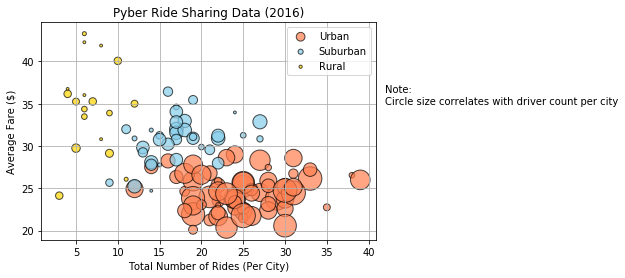

In [5]:
#Build the scatter plot

colors = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}
fig, ax = plt.subplots()

Urban = ax.scatter(Urban_df['Number of rides'], Urban_df['Avg fare'],
            s=8*Urban_df['Number of drivers'], c=Urban_df['Type of City'].apply(lambda x: colors[x]), edgecolors='Black', alpha=0.7,
            label='Urban')

Suburban = ax.scatter(Suburban_df['Number of rides'], Suburban_df['Avg fare'],
            s=8*Suburban_df['Number of drivers'], c=Suburban_df['Type of City'].apply(lambda x: colors[x]), edgecolors='Black', alpha=0.7,
            label='Suburban')

Rural = ax.scatter(Rural_df['Number of rides'], Rural_df['Avg fare'],
            s=8*Rural_df['Number of drivers'], c=Rural_df['Type of City'].apply(lambda x: colors[x]), edgecolors='Black', alpha=0.7,
            label='Rural')


plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#Adding a text next to the plot
textstr = 'Note:\nCircle size correlates with driver count per city'
# print textstr
plt.text(42, 35, textstr, fontsize=10)
plt.grid(True)

plt.legend(markerscale=0.5)


plt.show()

## Bubble Plot of Ride Sharing Data

In [ ]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


## Total Fares by City Type

In [6]:
# Calculate Type Percents

TotalFares_city_df = City_ride_merged_df[['city','fare','ride_id','driver_count','type']].groupby('type').agg({'fare': 'sum'}).reset_index()

TotalFares_city_df.rename(columns={'fare':'Total Fare', 'type': 'Type of City'}, inplace=True)

TotalFares_city_df.head()

,Type of City,Total Fare
0,Rural,4327.93
1,Suburban,19356.33
2,Urban,39854.38


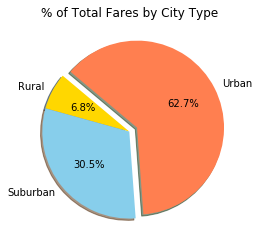

In [14]:
# Build Pie Chart

labels = TotalFares_city_df['Type of City']
explode = (0,0,0.1)
colors_pie = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}

    
ax = plt.subplot()
pie_wedge_collection = ax.pie(TotalFares_city_df['Total Fare'], labels=labels, explode = explode, shadow=True,
                              startangle=140, autopct='%1.1f%%', radius=1)


for pie_wedge in pie_wedge_collection[0]:
    
  
    pie_wedge.set_facecolor(colors_pie[pie_wedge.get_label()])
    

#plt.axis("equal")
plt.title("% of Total Fares by City Type")

#Save figure
plt.savefig("./Images/TotalFaresByCityType.png")
plt.show()

## Total Rides by City Type

In [9]:
# Calculate Ride Percents


TotalRides_city_df = City_ride_merged_df[['city','fare','ride_id','driver_count','type']].groupby('type').agg({'ride_id': 'count'}).reset_index()

TotalRides_city_df.rename(columns={'ride_id':'Total Rides', 'type': 'Type of City'}, inplace=True)

TotalRides_city_df.head()


,Type of City,Total Rides
0,Rural,125
1,Suburban,625
2,Urban,1625


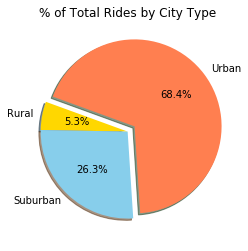

In [29]:
# Build Pie Chart

labels = TotalRides_city_df['Type of City']
explode = (0,0,0.1)
colors_pie = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}

    
ax = plt.subplot()
pie_wedge_collection_rides = ax.pie(TotalRides_city_df['Total Rides'], labels=labels, explode = explode, shadow=True,
                              startangle=160, autopct='%1.1f%%', radius=1)


for pie_wedge in pie_wedge_collection_rides[0]:

    pie_wedge.set_facecolor(colors_pie[pie_wedge.get_label()])
    

#plot the pie chart
plt.title("% of Total Rides by City Type")

#Save figure
plt.savefig("./Images/TotalRidesByCityType.png")
plt.show()

## Total Drivers by City Type

In [24]:
# Calculate Driver Percents
TotalDrivers_city_df = city_data[['driver_count','type']].groupby('type').agg({'driver_count': 'sum'}).reset_index()

TotalDrivers_city_df.rename(columns={'driver_count':'Total Drivers', 'type': 'Type of City'}, inplace=True)

TotalDrivers_city_df.head()


,Type of City,Total Drivers
0,Rural,78
1,Suburban,490
2,Urban,2405


Rural
Suburban
Urban


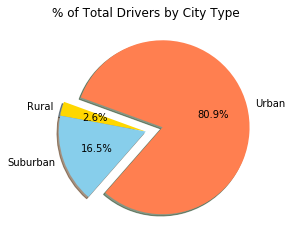

In [28]:
labels = TotalDrivers_city_df['Type of City']
explode = (0,0,0.2)
colors_pie = {'Urban':'Coral', 'Suburban':'SkyBlue', 'Rural':'Gold'}
#plt.pie(TotalDrivers_city_df['Total Drivers'], labels=labels, explode = explode, colors=colors_pie, shadow=True, 
 #       startangle=150, autopct='%1.2f%%')
    
ax = plt.subplot()
pie_wedge_collection_rides = ax.pie(TotalDrivers_city_df['Total Drivers'], labels=labels, explode = explode, shadow=True,
                              startangle=160, autopct='%1.1f%%', radius=1)


for pie_wedge in pie_wedge_collection_rides[0]:
    
    print(pie_wedge.get_label())
    pie_wedge.set_facecolor(colors_pie[pie_wedge.get_label()])
    

#plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("./Images/TotalDriversByCityType.png")
plt.show()

In [ ]:
# Show Figure
plt.show()